In [1]:
#!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
#!unzip jena_climate_2009_2016.csv.zip

In [2]:
filename = 'jena_climate_2009_2016.csv'

with open(filename) as f:
    data = f.read()

    lines = data.split('\n')
    header = lines[0].split(',')
    lines = lines[1:]
    print(header)
    print(len(lines))

for line in lines[:10]:
    print(line)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30
01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50
01.01.2009 01:20:00,996.50,-7.62,265.

In [3]:
import numpy as np
n_lines = len(lines)
n_headers = len(header)
temperature = np.zeros((n_lines,))
raw_data = np.zeros((n_lines, n_headers - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] # 1: to skip the date time column
    temperature[i] = values[1]
    raw_data[i,] = values

print(temperature[:3])
print(raw_data[:3, :3])

[-8.02 -8.41 -8.51]
[[996.52  -8.02 265.4 ]
 [996.57  -8.41 265.01]
 [996.53  -8.51 264.91]]


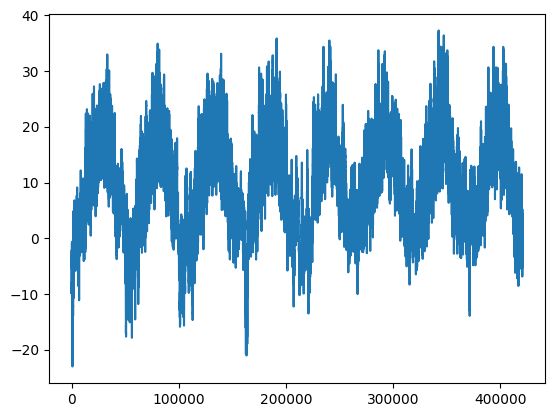

In [4]:
from matplotlib import pyplot as plt
plt.plot(range(n_lines), temperature)

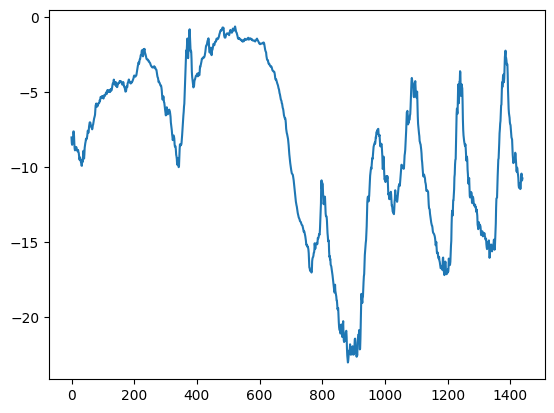

In [5]:
plt.plot(range(1440), temperature[:1440])

In [6]:
n_train = int(0.5 * n_lines)
n_val = int(0.25 * n_lines)
n_test = n_lines - n_train - n_val
print(n_train, n_val, n_test)

210225 105112 105114


In [7]:
print(raw_data[:3,:3])
mean = raw_data[:n_train].mean(axis=0)
std = raw_data[:n_train].std(axis=0)
z = (raw_data - mean) / std
print(z[:n_train].mean(axis=0), z[:n_train].std(axis=0))

[[996.52  -8.02 265.4 ]
 [996.57  -8.41 265.01]
 [996.53  -8.51 264.91]]
[ 2.41448143e-12 -3.04937772e-15  6.68831382e-13 -1.47390162e-14
  3.51971409e-15  5.17726056e-15 -1.97806893e-14 -1.56825520e-14
  3.62590596e-14  3.44193167e-15 -2.11724873e-13  1.60843651e-14
 -5.38064190e-14 -2.19450964e-15] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
import keras

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=n_train
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=n_train,
    end_index=n_train + n_val
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    z[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=n_train + n_val
)

2023-09-18 17:06:03.041138: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 17:06:03.165485: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 17:06:03.166242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 17:06:03.724263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-18 17:06:04.556252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

In [9]:
for samples, targets in train_dataset:
    print('batch samples shape: ', samples.shape)
    print('batch targets shape: ', targets.shape)
    break

batch samples shape:  (256, 120, 14)
batch targets shape:  (256,)


In [10]:
def evaluate_naive_method(dataset):
    total_abs_err = 0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(evaluate_naive_method(train_dataset), evaluate_naive_method(val_dataset), evaluate_naive_method(test_dataset))

2.6916438277703794 2.4417326002413855 2.6220358888180626


In [11]:
from tensorflow import keras
from tensorflow.keras import layers, activations, optimizers, losses, metrics, callbacks

inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation=activations.relu)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
callback_list = [
    callbacks.ModelCheckpoint('jena_dense', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_dense')
print(model.evaluate(test_dataset))


Epoch 1/10
808/819 [============================>.] - ETA: 0s - loss: 16.5099 - mean_absolute_error: 3.1383INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 5s 5ms/step - loss: 16.4501 - mean_absolute_error: 3.1327 - val_loss: 14.3440 - val_mean_absolute_error: 2.9917
Epoch 2/10
800/819 [============================>.] - ETA: 0s - loss: 11.3019 - mean_absolute_error: 2.6470INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 4s 5ms/step - loss: 11.2888 - mean_absolute_error: 2.6458 - val_loss: 13.1819 - val_mean_absolute_error: 2.8638
Epoch 3/10
819/819 [==============================] - 4s 5ms/step - loss: 10.0329 - mean_absolute_error: 2.4935 - val_loss: 16.5582 - val_mean_absolute_error: 3.2539
Epoch 4/10
808/819 [============================>.] - ETA: 0s - loss: 9.3096 - mean_absolute_error: 2.4058INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 4s 5ms/step - loss: 9.3114 - mean_absolute_error: 2.4060 - val_loss: 10.9157 - val_mean_absolute_error: 2.6230
Epoch 5/10
819/819 [==============================] - 4s 5ms/step - loss: 8.7688 - mean_absolute_error: 2.3347 - val_loss: 13.5798 - val_mean_absolute_error: 2.9229
Epoch 6/10
819/819 [==============================] - 4s 5ms/step - loss: 8.3872 - mean_absolute_error: 2.2821 - val_loss: 14.6492 - val_mean_absolute_error: 3.0229
Epoch 7/10
815/819 [============================>.] - ETA: 0s - loss: 8.0819 - mean_absolute_error: 2.2394INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 4s 5ms/step - loss: 8.0840 - mean_absolute_error: 2.2398 - val_loss: 10.9036 - val_mean_absolute_error: 2.6304
Epoch 8/10
806/819 [============================>.] - ETA: 0s - loss: 7.8023 - mean_absolute_error: 2.2000INFO:tensorflow:Assets written to: jena_dense/assets


INFO:tensorflow:Assets written to: jena_dense/assets


819/819 [==============================] - 4s 5ms/step - loss: 7.7992 - mean_absolute_error: 2.1998 - val_loss: 10.7576 - val_mean_absolute_error: 2.6004
Epoch 9/10
819/819 [==============================] - 4s 5ms/step - loss: 7.6092 - mean_absolute_error: 2.1731 - val_loss: 11.0801 - val_mean_absolute_error: 2.6399
Epoch 10/10
405/405 [==============================] - 1s 3ms/step - loss: 12.1061 - mean_absolute_error: 2.7452
[12.106147766113281, 2.7451984882354736]


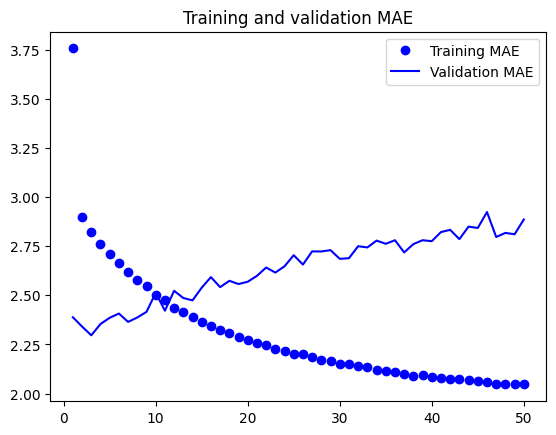

In [24]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training MAE')
plt.plot(epochs, val_loss, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.show()


In [13]:
inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.Conv1D(filters=8, kernel_size=24, activation=activations.relu)(inputs)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=8, kernel_size=12, activation=activations.relu)(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(filters=8, kernel_size=6, activation=activations.relu)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_conv', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])

history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_conv')
print(model.evaluate(test_dataset))


Epoch 1/10
815/819 [============================>.] - ETA: 0s - loss: 24.4944 - mean_absolute_error: 3.8788INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 7s 9ms/step - loss: 24.4779 - mean_absolute_error: 3.8777 - val_loss: 16.5446 - val_mean_absolute_error: 3.2174
Epoch 2/10
819/819 [==============================] - 7s 8ms/step - loss: 16.3593 - mean_absolute_error: 3.2133 - val_loss: 16.5540 - val_mean_absolute_error: 3.2003
Epoch 3/10
818/819 [============================>.] - ETA: 0s - loss: 14.2996 - mean_absolute_error: 2.9929INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 7s 8ms/step - loss: 14.2983 - mean_absolute_error: 2.9928 - val_loss: 14.6498 - val_mean_absolute_error: 3.0127
Epoch 4/10
814/819 [============================>.] - ETA: 0s - loss: 13.4205 - mean_absolute_error: 2.8961INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 7s 8ms/step - loss: 13.4131 - mean_absolute_error: 2.8954 - val_loss: 14.4883 - val_mean_absolute_error: 2.9955
Epoch 5/10
819/819 [==============================] - 7s 8ms/step - loss: 12.7873 - mean_absolute_error: 2.8291 - val_loss: 16.0414 - val_mean_absolute_error: 3.1672
Epoch 6/10
819/819 [==============================] - 7s 8ms/step - loss: 12.2806 - mean_absolute_error: 2.7745 - val_loss: 15.2634 - val_mean_absolute_error: 3.0957
Epoch 7/10
816/819 [============================>.] - ETA: 0s - loss: 11.8481 - mean_absolute_error: 2.7267INFO:tensorflow:Assets written to: jena_conv/assets


INFO:tensorflow:Assets written to: jena_conv/assets


819/819 [==============================] - 7s 9ms/step - loss: 11.8503 - mean_absolute_error: 2.7268 - val_loss: 14.4509 - val_mean_absolute_error: 2.9932
Epoch 8/10
819/819 [==============================] - 7s 9ms/step - loss: 11.5039 - mean_absolute_error: 2.6857 - val_loss: 17.1682 - val_mean_absolute_error: 3.2688
Epoch 9/10
819/819 [==============================] - 7s 8ms/step - loss: 11.2268 - mean_absolute_error: 2.6540 - val_loss: 18.4768 - val_mean_absolute_error: 3.4294
Epoch 10/10
405/405 [==============================] - 1s 3ms/step - loss: 15.9508 - mean_absolute_error: 3.1376
[15.95080280303955, 3.1376075744628906]


In [14]:
inputs = layers.Input(shape=(sequence_length, z.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_lstm', save_best_only=True)
]
model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callback_list)
model = keras.models.load_model('jena_lstm')
print(model.evaluate(test_dataset))

Epoch 1/10
817/819 [============================>.] - ETA: 0s - loss: 37.2411 - mean_absolute_error: 4.4393INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 22s 26ms/step - loss: 37.1978 - mean_absolute_error: 4.4364 - val_loss: 11.7799 - val_mean_absolute_error: 2.6283
Epoch 2/10
816/819 [============================>.] - ETA: 0s - loss: 10.9244 - mean_absolute_error: 2.5702INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 21s 26ms/step - loss: 10.9188 - mean_absolute_error: 2.5696 - val_loss: 10.0659 - val_mean_absolute_error: 2.4703
Epoch 3/10
818/819 [============================>.] - ETA: 0s - loss: 9.7953 - mean_absolute_error: 2.4413INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 20s 24ms/step - loss: 9.7951 - mean_absolute_error: 2.4412 - val_loss: 9.9669 - val_mean_absolute_error: 2.4527
Epoch 4/10
818/819 [============================>.] - ETA: 0s - loss: 9.4550 - mean_absolute_error: 2.3944INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 21s 26ms/step - loss: 9.4548 - mean_absolute_error: 2.3943 - val_loss: 9.8585 - val_mean_absolute_error: 2.4340
Epoch 5/10
819/819 [==============================] - 20s 24ms/step - loss: 9.1694 - mean_absolute_error: 2.3552 - val_loss: 9.9466 - val_mean_absolute_error: 2.4399
Epoch 6/10
817/819 [============================>.] - ETA: 0s - loss: 8.9959 - mean_absolute_error: 2.3336INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 21s 25ms/step - loss: 8.9988 - mean_absolute_error: 2.3340 - val_loss: 9.7626 - val_mean_absolute_error: 2.4270
Epoch 7/10
819/819 [==============================] - 21s 25ms/step - loss: 8.7978 - mean_absolute_error: 2.3083 - val_loss: 10.1335 - val_mean_absolute_error: 2.4618
Epoch 8/10
819/819 [==============================] - 20s 25ms/step - loss: 8.6343 - mean_absolute_error: 2.2851 - val_loss: 10.1461 - val_mean_absolute_error: 2.4571
Epoch 9/10
818/819 [============================>.] - ETA: 0s - loss: 8.4609 - mean_absolute_error: 2.2606INFO:tensorflow:Assets written to: jena_lstm/assets


INFO:tensorflow:Assets written to: jena_lstm/assets


819/819 [==============================] - 20s 24ms/step - loss: 8.4610 - mean_absolute_error: 2.2607 - val_loss: 9.7254 - val_mean_absolute_error: 2.4271
Epoch 10/10
405/405 [==============================] - 4s 8ms/step - loss: 11.0032 - mean_absolute_error: 2.6054
[11.00316333770752, 2.605429172515869]


In [15]:
state_t = 0

n_steps = 100
in_features = 32
out_features = 64

inputs = np.random.random((n_steps, in_features))
state_t = np.zeros((out_features,))

W = np.random.random((out_features, in_features))
U = np.random.random((out_features, out_features))
b = np.random.random((out_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.matmul(W, input_t) + np.matmul(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_seq = np.stack(successive_outputs, axis=0)

In [16]:
n_features = 14
inputs = layers.Input(shape=(None, n_features))
outputs = layers.SimpleRNN(16)(inputs)

In [17]:
n_features = 14
n_steps = 120
inputs = layers.Input(shape=(n_steps, n_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)

outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)

(None, 16)


(None, 120, 16)


In [18]:
inputs = layers.Input(shape=(n_steps, n_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)

In [19]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(units=32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_lstm_dropout', save_best_only=True)
]

model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_lstm_dropout')
print(model.evaluate(test_dataset))

Epoch 1/50
819/819 [==============================] - ETA: 0s - loss: 28.5141 - mean_absolute_error: 3.9468INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 31s 37ms/step - loss: 28.5141 - mean_absolute_error: 3.9468 - val_loss: 9.6464 - val_mean_absolute_error: 2.4013
Epoch 2/50
819/819 [==============================] - ETA: 0s - loss: 14.8672 - mean_absolute_error: 2.9970INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 30s 37ms/step - loss: 14.8672 - mean_absolute_error: 2.9970 - val_loss: 9.4289 - val_mean_absolute_error: 2.3766
Epoch 3/50
819/819 [==============================] - ETA: 0s - loss: 13.7823 - mean_absolute_error: 2.8781INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


INFO:tensorflow:Assets written to: jena_lstm_dropout/assets


819/819 [==============================] - 30s 37ms/step - loss: 13.7823 - mean_absolute_error: 2.8781 - val_loss: 9.1599 - val_mean_absolute_error: 2.3359
Epoch 4/50
819/819 [==============================] - 30s 36ms/step - loss: 13.1411 - mean_absolute_error: 2.8116 - val_loss: 9.3400 - val_mean_absolute_error: 2.3579
Epoch 5/50
819/819 [==============================] - 30s 36ms/step - loss: 12.7376 - mean_absolute_error: 2.7651 - val_loss: 9.7296 - val_mean_absolute_error: 2.4119
Epoch 6/50
819/819 [==============================] - 30s 36ms/step - loss: 12.3956 - mean_absolute_error: 2.7269 - val_loss: 9.2137 - val_mean_absolute_error: 2.3472
Epoch 7/50
819/819 [==============================] - 30s 36ms/step - loss: 11.9669 - mean_absolute_error: 2.6792 - val_loss: 9.8405 - val_mean_absolute_error: 2.4324
Epoch 8/50
819/819 [==============================] - 30s 36ms/step - loss: 11.7790 - mean_absolute_error: 2.6590 - val_loss: 9.3807 - val_mean_absolute_error: 2.3677
Epoch 9/5

In [23]:
inputs = layers.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callback_list = [
    callbacks.ModelCheckpoint('jena_stacked_gru_dropout', save_best_only=True)
]

model.compile(optimizer=optimizers.RMSprop(), loss=losses.mse, metrics=[metrics.mae])
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=callback_list)

model = keras.models.load_model('jena_stacked_gru_dropout')
print(model.evaluate(test_dataset))


Epoch 1/50
819/819 [==============================] - ETA: 0s - loss: 26.1046 - mean_absolute_error: 3.7564INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


819/819 [==============================] - 72s 86ms/step - loss: 26.1046 - mean_absolute_error: 3.7564 - val_loss: 9.5356 - val_mean_absolute_error: 2.3882
Epoch 2/50
819/819 [==============================] - ETA: 0s - loss: 13.9799 - mean_absolute_error: 2.8975INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


819/819 [==============================] - 67s 82ms/step - loss: 13.9799 - mean_absolute_error: 2.8975 - val_loss: 9.1144 - val_mean_absolute_error: 2.3408
Epoch 3/50
819/819 [==============================] - ETA: 0s - loss: 13.2474 - mean_absolute_error: 2.8218INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


INFO:tensorflow:Assets written to: jena_stacked_gru_dropout/assets


819/819 [==============================] - 71s 86ms/step - loss: 13.2474 - mean_absolute_error: 2.8218 - val_loss: 8.8167 - val_mean_absolute_error: 2.2964
Epoch 4/50
819/819 [==============================] - 68s 83ms/step - loss: 12.6830 - mean_absolute_error: 2.7613 - val_loss: 9.2347 - val_mean_absolute_error: 2.3540
Epoch 5/50
819/819 [==============================] - 69s 84ms/step - loss: 12.1610 - mean_absolute_error: 2.7087 - val_loss: 9.4419 - val_mean_absolute_error: 2.3856
Epoch 6/50
819/819 [==============================] - 69s 84ms/step - loss: 11.7529 - mean_absolute_error: 2.6647 - val_loss: 9.5674 - val_mean_absolute_error: 2.4072
Epoch 7/50
819/819 [==============================] - 75s 92ms/step - loss: 11.3442 - mean_absolute_error: 2.6178 - val_loss: 9.2451 - val_mean_absolute_error: 2.3647
Epoch 8/50
819/819 [==============================] - 79s 96ms/step - loss: 10.9697 - mean_absolute_error: 2.5766 - val_loss: 9.4612 - val_mean_absolute_error: 2.3873
Epoch 9/5